In [59]:
import pandas as pd
import io
import requests
url = "https://files.ontario.ca/pssd/en-2018-pssd-20190327.csv"

#Load csv_file from Service Ontario
x = requests.get(url=url).content 
df = pd.read_csv(io.StringIO(x.decode('utf8')))


In [60]:
# Transforming data "Salary Paid" from string to number
df['Salary Paid'] = df['Salary Paid'].map(lambda x: x.replace('$',''))
df['Salary Paid'] = df['Salary Paid'].map(lambda x: x.replace(',',''))

df['Salary Paid'] = pd.to_numeric(df['Salary Paid'], errors='coerce')
#df = pd.Series('Salary Paid', dtype='int32')
df['Salary Paid'] = df['Salary Paid'] 

df.head(5)

,Sector,Last Name,First Name,Salary Paid,Taxable Benefits,Employer,Job Title,Calendar Year
0,Colleges,Jensen,Cheryl,337533.24,"$ 3,408.12",Algonquin College,President,2018
1,Colleges,Brule,Claude,230976.76,$ 374.96,Algonquin College,Senior Vice President Academic,2018
2,Colleges,Wotherspoon,Doug,230788.38,$ 186.58,Algonquin College,Vice President Innovation and Strategy,2018
3,Colleges,Mcnair,Duane,221744.64,$ 366.12,Algonquin College,Vice President Finance and Administration,2018
4,Colleges,Stanbra,Laura,221744.64,$ 366.12,Algonquin College,Vice President Student Services,2018


In [61]:
#Filtering out names
df = df [['Sector', 'Salary Paid','First Name','Last Name','Employer','Job Title']]
df.head(5)

,Sector,Salary Paid,First Name,Last Name,Employer,Job Title
0,Colleges,337533.24,Cheryl,Jensen,Algonquin College,President
1,Colleges,230976.76,Claude,Brule,Algonquin College,Senior Vice President Academic
2,Colleges,230788.38,Doug,Wotherspoon,Algonquin College,Vice President Innovation and Strategy
3,Colleges,221744.64,Duane,Mcnair,Algonquin College,Vice President Finance and Administration
4,Colleges,221744.64,Laura,Stanbra,Algonquin College,Vice President Student Services


In [32]:
df_general = df.groupby(['Sector','Employer','Job Title'],as_index=False).mean()
df_general.head(5)

,Sector,Employer,Job Title,Salary Paid
0,Colleges,Algonquin College,Academic Manager,110833.92
1,Colleges,Algonquin College,Academic Manager Continuing Education,102746.86
2,Colleges,Algonquin College,Academic Manager Student Success,117690.58
3,Colleges,Algonquin College,Associate Director Advancement,136799.19
4,Colleges,Algonquin College,Associate Director Facilities Planning and Sus...,134727.60


In [33]:
df_general.describe()

,Salary Paid
count,4.012900e+04
mean,1.333027e+05
std,4.543315e+04
min,1.000000e+05
25%,1.075926e+05
50%,1.189455e+05
75%,1.412004e+05
max,1.746825e+06


### We can see there are 40000 different positions with different different employers from different sectors. The average salary is 133k. The minimum is 100k which is the data criteria (It only shows salary greater than 100k) the maximum salary is 1.74 mil per year.

In [36]:
# Let's see the salary distribution by sector
df_Sector = df.groupby(['Sector'],as_index=False).mean()
df_Sector

,Sector,Salary Paid
0,Colleges,116539.617315
1,Crown Agencies,132395.627540
2,Government of Ontario - Judiciary,210918.580395
3,Government of Ontario - Legislative Assembly a...,133250.115937
4,Government of Ontario - Ministries,126367.891756
5,Hospitals and Boards of Public Health,125047.821112
6,Municipalities and Services,120769.594846
7,Ontario Power Generation,144819.598041
8,Other Public Sector Employers,131618.113036
9,School Boards,111672.406216


### We can see there are 17 different sectors, now it is easier to picture the salary distribution

[Text(0, 0, 'Colleges'),
 Text(0, 0, 'Crown Agencies'),
 Text(0, 0, 'Government of Ontario - Judiciary'),
 Text(0, 0, 'Government of Ontario - Legislative Assembly and Offices'),
 Text(0, 0, 'Government of Ontario - Ministries'),
 Text(0, 0, 'Hospitals and Boards of Public Health'),
 Text(0, 0, 'Municipalities and Services'),
 Text(0, 0, 'Ontario Power Generation'),
 Text(0, 0, 'Other Public Sector Employers'),
 Text(0, 0, 'School Boards'),
 Text(0, 0, 'Seconded (Advanced Education and Skills Development)*'),
 Text(0, 0, 'Seconded (Children and Youth Services)*'),
 Text(0, 0, 'Seconded (Community Safety and Correctional Services)*'),
 Text(0, 0, 'Seconded (Community and Social Services)*'),
 Text(0, 0, 'Seconded (Education)*'),
 Text(0, 0, 'Seconded (Labour)*'),
 Text(0, 0, 'Universities')]

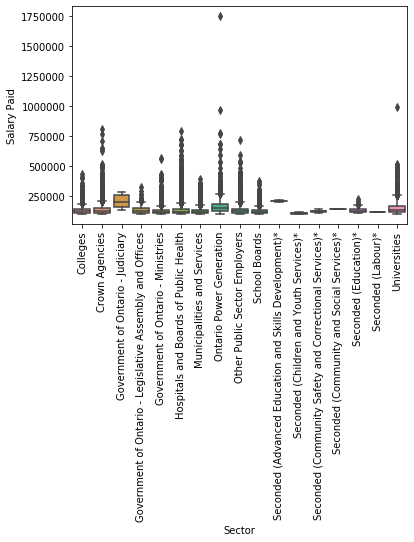

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.boxplot(x = "Sector", y="Salary Paid", data=df_general)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### From the box chart we can see most of jobs are at between 100k-200k except Government of Ontario - Judiciary, which we can explore further to see what kind of positions they have. and all other outliers have extremely high pays from 200k to 1.75mil. The highest 1.75 mil the at Ontario Power Generation, it must be the president of OPG. 

### We can see there are 1863 different employers, it is not very easy to visualize the numbers

In [42]:
df_Employer = df.groupby(['Employer'],as_index=False).mean()
df_Employer

,Employer,Salary Paid
0,2021 Canada Games Host Society Inc,195554.000000
1,360Kids Support Services,124999.940000
2,AIDS Committee of Toronto,133041.780000
3,Abilities Centre,110459.600000
4,Ableliving Services Inc,114022.530000
5,Abrigo Centre,104500.000000
6,Access Alliance Multicultural Health and Commu...,146463.873750
7,Access Community Services Incorporated,106394.230000
8,Access Independent Living Services,114626.000000
9,Accessibility Directorate of Ontario,121073.263438


In [43]:
df_Positions = df.groupby(['Job Title'],as_index=False).mean()
df_Positions

,Job Title,Salary Paid
0,1st Class Constable,110863.706730
1,1st Class Fire Fighter,107769.036961
2,1st Class Firefighter,112442.622586
3,1st Class Firefighter/Captain,118163.088889
4,1st Class Police Constable,108823.180000
5,2nd Class Engineer,105914.910000
6,2nd Class Firefighter,104095.940000
7,3rd Class Engineer,103093.270000
8,911 Call Centre Supervisor,103803.150000
9,Abilities Management Specialist,103465.803333


In [50]:
df_sorted = df.sort_values('Salary Paid',ascending = False).head(10)
df_sorted_Count = df_sorted.groupby('Employer')['Salary Paid'].nunique()
df_sorted_Count

Employer
Baycrest Centre for Geriatric Care                              1
Ontario Lottery and Gaming Corporation                          1
Ontario Power Generation                                        4
Ontario Public Service Pension Board (Ontario Pension Board)    1
Sunnybrook Health Sciences Centre                               1
The Hospital for Sick Children                                  1
University of Toronto                                           1
Name: Salary Paid, dtype: int64

### We can see from top 10 paid employer, Ontario Power Generaion has 4 

In [52]:
df_sorted = df.sort_values('Salary Paid',ascending = False).head(20)
df_sorted_Count = df_sorted.groupby('Employer')['Salary Paid'].nunique()
df_sorted_Count

Employer
Baycrest Centre for Geriatric Care                              1
Centre for Addiction and Mental Health                          1
Independent Electricity System Operator                         1
Liquor Control Board of Ontario                                 1
Ontario Financing Authority                                     1
Ontario Lottery and Gaming Corporation                          1
Ontario Power Generation                                        6
Ontario Public Service Pension Board (Ontario Pension Board)    1
Ontario Securities Commission                                   1
Sinai Health System                                             1
St. Joseph's Healthcare Hamilton                                1
Sunnybrook Health Sciences Centre                               1
The Hospital for Sick Children                                  1
Trillium Health Partners                                        1
University of Toronto                                           1
N

### We can see from top 20paid employer, Ontario Power Generaion has 6

In [54]:
df_sorted = df.sort_values('Salary Paid',ascending = False).head(10)
df_sorted_Count = df_sorted.groupby('Job Title')['Salary Paid'].nunique()
df_sorted_Count

Job Title
Chief Nuclear Officer                                                                         1
Former President and Chief Executive Officer                                                  1
Nuclear President and Chief Nuclear Officer                                                   1
President and Chief Executive Officer                                                         3
President and Chief Executive Officer / Président et chef de la direction                     2
President and Chief Investment Officer, University of Toronto Asset Management Corporation    1
Senior Vice President Nuclear Projects                                                        1
Name: Salary Paid, dtype: int64

In [55]:
df_sorted = df.sort_values('Salary Paid',ascending = False).head(5)
df_sorted_Count = df_sorted.groupby('Sector')['Salary Paid'].nunique()
df_sorted_Count

Sector
Crown Agencies                           1
Hospitals and Boards of Public Health    1
Ontario Power Generation                 2
Universities                             1
Name: Salary Paid, dtype: int64

### Let us see the final, who earns the most from public sector in Ontario in 2018

In [63]:
df_sorted = df.sort_values('Salary Paid',ascending = False).head(10)
df_sorted

,Sector,Salary Paid,First Name,Last Name,Employer,Job Title
97829,Ontario Power Generation,1746824.96,Jeffrey,Lyash,Ontario Power Generation,President and Chief Executive Officer
144846,Universities,989308.00,Daren,Smith,University of Toronto,"President and Chief Investment Officer, Univer..."
96773,Ontario Power Generation,962749.44,Glenn,Jager,Ontario Power Generation,Nuclear President and Chief Nuclear Officer
11516,Crown Agencies,803552.16,Mark,Fuller,Ontario Public Service Pension Board (Ontario ...,President and Chief Executive Officer / Présid...
43429,Hospitals and Boards of Public Health,792571.78,Michael,Apkon,The Hospital for Sick Children,Former President and Chief Executive Officer
96096,Ontario Power Generation,774054.83,Sean,Granville,Ontario Power Generation,Chief Nuclear Officer
98688,Ontario Power Generation,766192.79,Dietmar E.,Reiner,Ontario Power Generation,Senior Vice President Nuclear Projects
11301,Crown Agencies,765406.86,Stephen,Rigby,Ontario Lottery and Gaming Corporation,President and Chief Executive Officer / Présid...
30796,Hospitals and Boards of Public Health,722875.01,William,Reichman,Baycrest Centre for Geriatric Care,President and Chief Executive Officer
42519,Hospitals and Boards of Public Health,714999.48,Andy,Smith,Sunnybrook Health Sciences Centre,President and Chief Executive Officer


### Now you have the Sector, employer and sector as well as the employees' name who earns the most